In [93]:
# importações
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# dataframe
df = pd.read_csv("https://raw.githubusercontent.com/zhangzhao156/Human-Activity-Recognition-Codes-Datasets/master/data/SanitationDataset/sanitation.csv")

In [89]:
df

,x,y,z,label,seg,suspicious
0,20,781,-507,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
1,40,797,-492,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
2,59,807,-502,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
3,75,807,-527,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
4,107,806,-560,walk,walk/863137003295439_walk_L_2017-07-25 17-39-0...,False
...,...,...,...,...,...,...
266550,-941,174,337,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266551,-942,173,314,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266552,-916,158,310,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False
266553,-898,145,304,clean,clean/庆喜/repeat_82-duration_60.csv-1584-1628,False


In [ ]:
# armazenando os valores de label
labelsName = df["label"].unique()

In [ ]:
# dataframe que ira armazenar os valores das features dos calculadas
df_trat = pd.DataFrame()

In [ ]:
# tempo de execução médio do código: 9 minutos
# for de iteração de cada label do dataframe
for lb in range(0, len(labelsName)):
  # tratando os dados: separando as linhas de cada label, split do ultimo numero da janela, retirando a coluna antiga da janela e inserindo a nova, armazenando os valores de cada janela
  dfSplited = df[df["label"] == labelsName[lb]]
  lastNDfSplited = dfSplited["seg"].squeeze()
  lastNDfSplited = lastNDfSplited.str.rsplit("-", n=1, expand=True)
  lastNDfSplited.rename(columns={0: 'seg', 1: 'random'}, inplace=True)
  dfSplited = dfSplited.drop(columns=['seg'])
  dfSplited = pd.concat([dfSplited, lastNDfSplited], axis=1)
  dfSplited = dfSplited[['x', 'y', 'z', 'label', 'seg', 'random', 'suspicious']]
  windowsDfSplited = dfSplited["random"].unique()

  cont = 0

  # for de iteração de cada janela de cada label do dataframe
  for window in range(len(df_trat), len(df_trat) + len(windowsDfSplited)):
    # calculando as features: maximo, minimo, binomial, media, mediana, variancia, desvp, mad
    df_trat.loc[window, 'maxX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max()
    df_trat.loc[window, 'minX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()
    df_trat.loc[window, 'binX'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].x.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].x.min()) / 10
    df_trat.loc[window, 'medX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mean()
    df_trat.loc[window, 'mediX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.median()
    df_trat.loc[window, 'varX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.var()
    df_trat.loc[window, 'desvX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.std()
    df_trat.loc[window, 'madX'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].x.mad()

    df_trat.loc[window, 'maxY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max()
    df_trat.loc[window, 'minY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()
    df_trat.loc[window, 'binnY'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].y.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].y.min()) / 10
    df_trat.loc[window, 'medY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mean()
    df_trat.loc[window, 'mediY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.median()
    df_trat.loc[window, 'varY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.var()
    df_trat.loc[window, 'desvY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.std()
    df_trat.loc[window, 'madY'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].y.mad()

    df_trat.loc[window, 'maxZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max()
    df_trat.loc[window, 'minZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()
    df_trat.loc[window, 'binZ'] = (dfSplited[dfSplited.random == windowsDfSplited[cont]].z.max() - dfSplited[dfSplited.random == windowsDfSplited[cont]].z.min()) / 10
    df_trat.loc[window, 'medZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mean()
    df_trat.loc[window, 'mediZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.median()
    df_trat.loc[window, 'varZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.var()
    df_trat.loc[window, 'desvZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.std()
    df_trat.loc[window, 'madZ'] = dfSplited[dfSplited.random == windowsDfSplited[cont]].z.mad()

    cont+=1

df_trat

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,desvY,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ
0,143.0,-128.0,27.1,-42.970588,-77.0,6320.655838,79.502552,68.980104,896.0,696.0,...,41.808334,33.126298,-460.0,-691.0,23.1,-536.161765,-531.0,2895.421203,53.809118,43.117215
1,-88.0,-143.0,5.5,-109.395349,-105.0,246.339978,15.695221,13.482964,961.0,843.0,...,32.402183,28.484586,-159.0,-445.0,28.6,-312.511628,-322.0,8310.589147,91.162433,80.174148
2,15.0,-61.0,7.6,-24.238095,-30.0,319.795587,17.882829,15.204082,1006.0,951.0,...,12.633515,9.793651,-10.0,-134.0,12.4,-52.738095,-40.5,1344.783391,36.671288,31.379819
3,-59.0,-160.0,10.1,-120.176471,-128.0,559.550483,23.654819,20.008651,1016.0,851.0,...,36.453378,28.766003,-58.0,-455.0,39.7,-213.500000,-186.5,9542.522388,97.685835,83.250000
4,1053.0,-130.0,118.3,517.697674,631.0,215070.930233,463.757405,431.114116,772.0,77.0,...,170.741533,139.366144,137.0,-835.0,97.2,-473.325581,-577.0,94687.796235,307.713822,269.156301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,737.0,621.0,11.6,681.467742,679.0,431.597303,20.774920,16.239854,371.0,271.0,...,24.780138,20.555671,729.0,619.0,11.0,673.370968,679.0,912.302750,30.204350,26.528616
4390,804.0,661.0,14.3,730.326531,734.0,1335.016156,36.537873,30.211579,421.0,288.0,...,40.599797,35.099542,700.0,518.0,18.2,599.265306,588.0,3028.698980,55.033617,46.202416
4391,1078.0,404.0,67.4,756.268293,763.0,23795.501220,154.257905,104.638905,428.0,-146.0,...,141.282868,112.424747,794.0,315.0,47.9,623.268293,646.0,10985.351220,104.811026,71.633551
4392,1126.0,581.0,54.5,771.577465,757.0,7817.676056,88.417623,47.450506,465.0,35.0,...,74.628971,50.536005,726.0,396.0,33.0,598.732394,611.0,4019.170221,63.396926,42.271771


In [ ]:
df_trat

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,desvY,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ
0,143.0,-128.0,27.1,-42.970588,-77.0,6320.655838,79.502552,68.980104,896.0,696.0,...,41.808334,33.126298,-460.0,-691.0,23.1,-536.161765,-531.0,2895.421203,53.809118,43.117215
1,-88.0,-143.0,5.5,-109.395349,-105.0,246.339978,15.695221,13.482964,961.0,843.0,...,32.402183,28.484586,-159.0,-445.0,28.6,-312.511628,-322.0,8310.589147,91.162433,80.174148
2,15.0,-61.0,7.6,-24.238095,-30.0,319.795587,17.882829,15.204082,1006.0,951.0,...,12.633515,9.793651,-10.0,-134.0,12.4,-52.738095,-40.5,1344.783391,36.671288,31.379819
3,-59.0,-160.0,10.1,-120.176471,-128.0,559.550483,23.654819,20.008651,1016.0,851.0,...,36.453378,28.766003,-58.0,-455.0,39.7,-213.500000,-186.5,9542.522388,97.685835,83.250000
4,1053.0,-130.0,118.3,517.697674,631.0,215070.930233,463.757405,431.114116,772.0,77.0,...,170.741533,139.366144,137.0,-835.0,97.2,-473.325581,-577.0,94687.796235,307.713822,269.156301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,737.0,621.0,11.6,681.467742,679.0,431.597303,20.774920,16.239854,371.0,271.0,...,24.780138,20.555671,729.0,619.0,11.0,673.370968,679.0,912.302750,30.204350,26.528616
4390,804.0,661.0,14.3,730.326531,734.0,1335.016156,36.537873,30.211579,421.0,288.0,...,40.599797,35.099542,700.0,518.0,18.2,599.265306,588.0,3028.698980,55.033617,46.202416
4391,1078.0,404.0,67.4,756.268293,763.0,23795.501220,154.257905,104.638905,428.0,-146.0,...,141.282868,112.424747,794.0,315.0,47.9,623.268293,646.0,10985.351220,104.811026,71.633551
4392,1126.0,581.0,54.5,771.577465,757.0,7817.676056,88.417623,47.450506,465.0,35.0,...,74.628971,50.536005,726.0,396.0,33.0,598.732394,611.0,4019.170221,63.396926,42.271771


In [ ]:
# nomeando a coluna label com as respectivas labels das linhas do dataframe das features
df_trat.loc[0:170, 'label'] = 'walk'
df_trat.loc[171:1423, 'label'] = 'bweep' 
df_trat.loc[1424:2007, 'label'] = 'clean'
df_trat.loc[2008:2970, 'label'] = 'sweep' 
df_trat.loc[2971:3840, 'label'] = 'daily'
df_trat.loc[3841:4316, 'label'] = 'dump'
df_trat.loc[4317:4393, 'label'] = 'run'

In [ ]:
# arredondando os valores das features
df_trat = df_trat.round(2)

bweep = 0
clean = 1
daily = 2
dump = 3
run = 4
sweep = 5
walk = 6

In [ ]:
df_trat["label"] = df_trat["label"].astype('category')
df_trat["label"] = df_trat["label"].cat.codes

In [ ]:
# embaralhando os dados
df_shuffled = df_trat.sample(frac=1).reset_index(drop=True)
df_shuffled

,maxX,minX,binX,medX,mediX,varX,desvX,madX,maxY,minY,...,madY,maxZ,minZ,binZ,medZ,mediZ,varZ,desvZ,madZ,label
0,1285.0,46.0,123.9,865.78,975.0,110513.38,332.44,268.64,1070.0,-195.0,...,209.22,1137.0,101.0,103.6,433.90,391.0,44769.76,211.59,158.36,1
1,-586.0,-1493.0,90.7,-931.80,-846.5,71221.14,266.87,229.33,657.0,-623.0,...,332.28,471.0,-69.0,54.0,141.36,113.5,19079.45,138.13,108.48,5
2,-188.0,-1520.0,133.2,-709.93,-633.0,108417.87,329.27,250.14,573.0,-479.0,...,214.06,-187.0,-1145.0,95.8,-685.22,-720.0,54830.43,234.16,192.18,0
3,-507.0,-1223.0,71.6,-924.74,-949.5,35733.26,189.03,156.84,678.0,-89.0,...,171.74,176.0,-801.0,97.7,-242.15,-248.5,48948.75,221.24,172.32,5
4,1686.0,390.0,129.6,973.88,969.5,125673.35,354.50,299.12,597.0,-54.0,...,140.11,1139.0,-430.0,156.9,442.04,524.0,232135.64,481.80,408.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,-480.0,-1244.0,76.4,-815.49,-792.0,34940.96,186.93,156.43,389.0,-175.0,...,130.04,-283.0,-1028.0,74.5,-581.39,-541.0,34772.59,186.47,155.35,0
4390,964.0,-848.0,181.2,-258.15,-563.5,360876.68,600.73,510.56,1312.0,-104.0,...,258.12,363.0,-913.0,127.6,-265.08,-328.0,103461.99,321.66,262.15,0
4391,1908.0,320.0,158.8,978.24,889.5,213606.62,462.18,411.63,499.0,59.0,...,113.80,332.0,-304.0,63.6,74.76,82.5,22521.65,150.07,114.68,2
4392,979.0,-672.0,165.1,-36.51,-136.0,143173.39,378.38,303.07,1305.0,18.0,...,202.99,590.0,-1049.0,163.9,-382.25,-423.0,111263.62,333.56,251.19,0


In [ ]:
df_input = df_shuffled.iloc[:,0:23]
df_output = df_shuffled.iloc[:,24]
X = df_input.values
Y = df_output.values

In [ ]:
smt = SMOTE()

In [ ]:
X, Y = smt.fit_resample(X, Y)

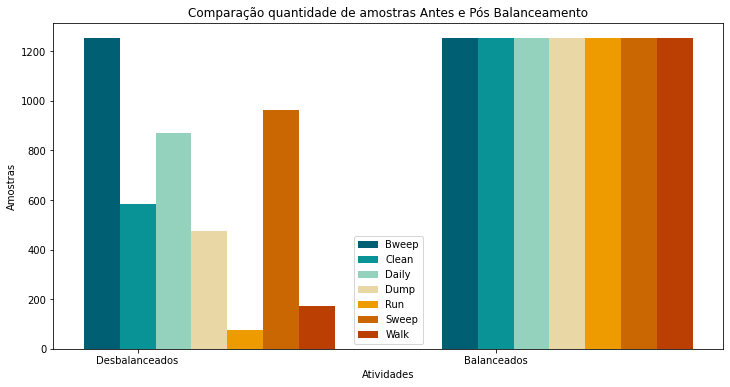

In [ ]:
#Quantidades
qtd0 = [len(df_trat[df_trat["label"] == 0]), len(X[Y == 0])]
qtd1 = [len(df_trat[df_trat["label"] == 1]), len(X[Y == 1])]
qtd2 = [len(df_trat[df_trat["label"] == 2]), len(X[Y == 2])]
qtd3 = [len(df_trat[df_trat["label"] == 3]), len(X[Y == 3])]
qtd4 = [len(df_trat[df_trat["label"] == 4]), len(X[Y == 4])]
qtd5 = [len(df_trat[df_trat["label"] == 5]), len(X[Y == 5])]
qtd6 = [len(df_trat[df_trat["label"] == 6]), len(X[Y == 6])]

# Tamanho das barras
barWidth = 0.1

# Tamanho da figura
plt.figure(figsize=(12,6))

# Posição das barras
r0 = np.arange(len(qtd0))
r1 = [x + barWidth for x in r0]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Criando as barras
plt.bar(r0, qtd0, color="#005f73", width=barWidth, label="Bweep")
plt.bar(r1, qtd1, color="#0a9396", width=barWidth, label="Clean")
plt.bar(r2, qtd2, color="#94d2bd", width=barWidth, label="Daily")
plt.bar(r3, qtd3, color="#e9d8a6", width=barWidth, label="Dump")
plt.bar(r4, qtd4, color="#ee9b00", width=barWidth, label="Run")
plt.bar(r5, qtd5, color="#ca6702", width=barWidth, label="Sweep")
plt.bar(r6, qtd6, color="#bb3e03", width=barWidth, label="Walk")

# Adicionando legenda as barras
plt.xlabel('Atividades')
plt.xticks([r + barWidth for r in range(len(qtd0))], ['Desbalanceados', 'Balanceados'])
plt.ylabel('Amostras')
plt.title('Comparação quantidade de amostras Antes e Pós Balanceamento')

# Legenda e exibindo o gráfico
plt.legend()
plt.show()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=5)

In [129]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
# custom_cmap = matplotlib.colors.ListedColormap(["#E9D8A6", "#94D2BD", "#0A9396", "#005F73", "#00313B"])
# custom_cmap = matplotlib.colors.ListedColormap(["#94D2BD", "#0A9396", "#005F73", "#003F4B"])
custom_cmap = matplotlib.colors.ListedColormap(["#94D2BD", "#0A9396", "#005F73"])

In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=custom_cmap):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# KNN

## Teste do algoritmo

In [132]:
knn = KNeighborsClassifier(n_neighbors=4)

In [159]:
# treinando o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [160]:
# predição dos valores do conjunto de teste
y_pred = knn.predict(X_test)
y_pred

array([3, 2, 5, ..., 5, 0, 4], dtype=int8)

In [161]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision Test:",metrics.precision_score(y_test,y_pred))
# print("Recall Test:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.9156534954407295


In [162]:
f1_score(y_test, y_pred, average='weighted') 

0.9152372404386558

In [164]:
labels = df_shuffled["label"].unique()

In [165]:
labelsName.sort()
labels.sort()

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       382
           1       0.91      0.89      0.90       386
           2       0.90      0.87      0.89       404
           3       0.87      0.93      0.90       345
           4       0.96      1.00      0.98       378
           5       0.90      0.91      0.91       383
           6       0.97      0.98      0.97       354

    accuracy                           0.92      2632
   macro avg       0.92      0.92      0.92      2632
weighted avg       0.92      0.92      0.92      2632

Confusion matrix, without normalization
[[322   9  15  11   0  22   3]
 [ 13 344  12   5   8   4   0]
 [  7  15 352  16   2   5   7]
 [  8   7   1 320   2   7   0]
 [  0   1   0   0 377   0   0]
 [ 10   4   5  14   0 349   1]
 [  1   0   5   0   2   0 346]]


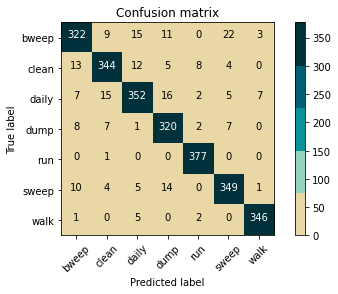

In [166]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix')

In [ ]:
accuracys = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracys.append(metrics.accuracy_score(y_test, pred_i))

In [ ]:
accuracys

[0.9407294832826748,
 0.9300911854103343,
 0.9289513677811551,
 0.9266717325227963,
 0.9209726443768997,
 0.9171732522796353,
 0.9084346504559271,
 0.9133738601823708,
 0.9095744680851063]

Text(0, 0.5, 'Accuracy')

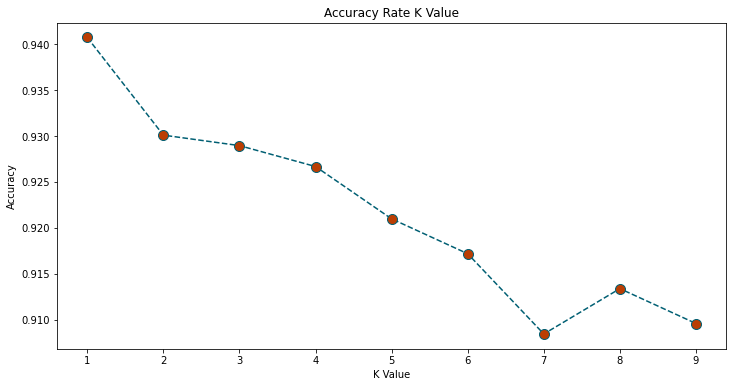

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

In [ ]:
# validação cruzada
num_folds = 5
scores = cross_val_score(knn, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.91, 0.89, 0.89, 0.88, 0.89])

In [ ]:
stdevCross = scores.std()
stdevCross

0.009487406603767823

## Avaliação mudança de atividade

1. Escolher uma amostra de um tipo de atividade qualquer e rodar a avaliação do algoritmo.

2. Sortear um numero com probabilidade de 10% para um numero e 90% para outra, caso caia nos 10% escolher uma outra amostra de uma atividade diferente, do contrário escolher outra amostra com a mesma atividade.

3. Rodar a avaliação do algoritmo.

4. Repetir os passos com o restante das amostras.

5. Ao final, analizar as métricas.

> Sequencia de uma atividade - marcar mudança como False

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como FN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como TP

> Mudança de atividade - marcar mudança como True

- Algoritmo identificar como atividade diferente (mudança de atividade para o algoritmo) marcar como TN
- Algoritmo identificar como mesma atividade (não mudança de atividade para o algoritmo) marcar como FP

In [117]:
copyX_test = X_test
copyY_test = y_test

In [118]:
# tempo de execução médio do código: 5 minutos
accuracys = []
FPs = []
FNs = []
trues = []
predictions = []
# for i in np.arange(0.1, 1, 0.1):
# labels = [0, 1, 2, 3, 4, 5, 6]
labels = df_shuffled["label"].unique().tolist()

TP = 0
TN = 0
FP = 0
FN = 0

formerLabel = 0
formerPrediction = 0

initialRandomLabel = random.choice(labels) # Label aleatória inicial

positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
positionsCurrentCopyYTest = positionsInitialCopyYTest

initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

positionsLabelsHistoric = []


initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
currentPrediction = initialPrediction

positionsLabelsHistoric.append(initialPositionLabel)

# loop da analise que ira iterar cada amostra do conjunto de amostras
while True:
  if len(labels) == 1:
    positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

    positions = positionsCurrentCopyYTest[0].tolist()

    # subtrair arrays
    for a in positionsLabelsHistoric: 
      if a in positions: 
        positions.remove(a)

    newPositionLabel = random.choice(positions)
    positionsLabelsHistoric.append(newPositionLabel)

    formerPrediction = currentPrediction

    currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
    if currentPrediction == formerPrediction:
      FP = FP + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])
    else:
      TN = TN + 1
      trues.append(formerPrediction[0])
      predictions.append(currentPrediction[0])


    for positionLabel in positions:
      formerPrediction = currentPrediction

      currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
      if currentPrediction == formerPrediction:
        TP = TP + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])
      else:
        FN = FN + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])

    positions = []
  else:
    randomNumber = random.random()

    # Analisando nova amostra da mesma atividade 
    if randomNumber > 0.1:
      # transformando as posições da label que estao em tupla para lista
      positions = positionsCurrentCopyYTest[0].tolist()

      # subtrair arrays
      for a in positionsLabelsHistoric: 
        if a in positions: 
          positions.remove(a)

      if positions == []:
        while positions == []:
          formerLabel = currentRandomLabel
          labels.remove(formerLabel)

          currentRandomLabel = random.choice(labels)

          positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

          positions = positionsCurrentCopyYTest[0].tolist()

          for a in positionsLabelsHistoric: 
            if a in positions: 
              positions.remove(a)

        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

      newPositionLabel = random.choice(positions)
      positionsLabelsHistoric.append(newPositionLabel)

      formerPrediction = currentPrediction

      currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
      if currentPrediction == formerPrediction:
        TP = TP + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])
      else:
        FN = FN + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])

    # Analise de uma nova amostra de atividade diferente
    if randomNumber < 0.1:
      # armazenando a antiga label e removendo a mesma temporariamente do array de labels
      formerLabel = currentRandomLabel
      labels.remove(formerLabel)

      # if de len label == 1
      if len(labels) == 1:
        positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

        positions = positionsCurrentCopyYTest[0].tolist()

        # subtrair arrays
        for a in positionsLabelsHistoric: 
          if a in positions: 
            positions.remove(a)

        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          FP = FP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          TN = TN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

        for positionLabel in positions:
          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            TP = TP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            FN = FN + 1      
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])


        positions = []
      else:
        # Randomizando uma nova label
        currentRandomLabel = random.choice(labels)
        # NDArray com as posições da nova label e randomização da posição aleatoria
        positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

        positions = positionsCurrentCopyYTest[0].tolist()

        # subtrair arrays
        for a in positionsLabelsHistoric: 
          if a in positions: 
            positions.remove(a)

        if positions == []:
          while positions == []:
            formerLabel = currentRandomLabel
            labels.remove(formerLabel)

            currentRandomLabel = random.choice(labels)

            positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

            positions = positionsCurrentCopyYTest[0].tolist()

            for a in positionsLabelsHistoric: 
              if a in positions: 
                positions.remove(a)

          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
        else:
          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])

          # devolvendo a label antiga ao array de labels
          labels.insert(formerLabel - 1, formerLabel)

  if positions == []:
    break

print(FP)
print(FN)
print(TP)
print(TN)

accuracy = (TP + TN)/(TP + TN + FP + FN)
# accuracys.append(accuracy)
# FPs.append(FP)
# FNs.append(FN)



3
348
1962
231


In [122]:
labels = df_shuffled["label"].unique()

In [123]:
labels.sort()

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       305
           1       0.76      0.76      0.76       377
           2       0.71      0.71      0.71       387
           3       0.76      0.76      0.76       365
           4       0.85      0.86      0.86       391
           5       0.78      0.78      0.78       380
           6       0.86      0.86      0.86       339

    accuracy                           0.77      2544
   macro avg       0.77      0.77      0.77      2544
weighted avg       0.77      0.77      0.77      2544

Confusion matrix, without normalization
[[204  17  20  21  14  23   6]
 [ 23 286  25  13  11  12   7]
 [ 21  29 275  24   8  13  17]
 [ 15  16  19 276  12  23   4]
 [  7  15  12   8 335   5   9]
 [ 25  10  18  22   6 296   3]
 [ 10   4  18   1   6   7 293]]


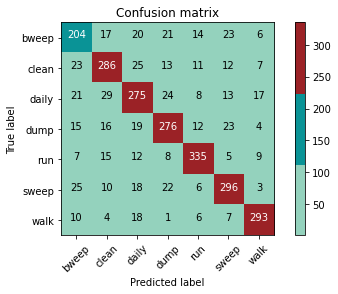

In [127]:
cnf_matrix = confusion_matrix(trues, predictions, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(trues, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix')

### Variação das probabilidades

In [ ]:
# tempo de execução médio do código: 5 minutos
accuracys = []
FPs = []
FNs = []
trues = []
predictions = []
for i in np.arange(0.1, 1, 0.1):
  # labels = [0, 1, 2, 3, 4, 5, 6]
  labels = df_shuffled["label"].unique().tolist()

  TP = 0
  TN = 0
  FP = 0
  FN = 0

  formerLabel = 0
  formerPrediction = 0

  initialRandomLabel = random.choice(labels) # Label aleatória inicial

  positionsInitialCopyYTest = np.where(copyY_test == initialRandomLabel) # Todas as posições em que a label inicial aparece
  positionsCurrentCopyYTest = positionsInitialCopyYTest

  initialPositionLabel = copyY_test[random.choice(positionsInitialCopyYTest[0])] # Posição aleatória em que a label inicial aparece, essa posição tambem valera para a primeira amostra
  currentRandomLabel = initialRandomLabel # label atual, no inicio da analise a label inicial é a label atual 

  positionsLabelsHistoric = []


  initialPrediction = knn.predict(copyX_test[initialPositionLabel].reshape(1, -1)) # predição da linha inicial da analise
  currentPrediction = initialPrediction

  positionsLabelsHistoric.append(initialPositionLabel)

  # loop da analise que ira iterar cada amostra do conjunto de amostras
  while True:
    if len(labels) == 1:
      positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

      positions = positionsCurrentCopyYTest[0].tolist()

      # subtrair arrays
      for a in positionsLabelsHistoric: 
        if a in positions: 
          positions.remove(a)

      newPositionLabel = random.choice(positions)
      positionsLabelsHistoric.append(newPositionLabel)

      formerPrediction = currentPrediction

      currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
      if currentPrediction == formerPrediction:
        FP = FP + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])
      else:
        TN = TN + 1
        trues.append(formerPrediction[0])
        predictions.append(currentPrediction[0])


      for positionLabel in positions:
        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

      positions = []
    else:
      randomNumber = random.random()

      # Analisando nova amostra da mesma atividade 
      if randomNumber > i:
        # transformando as posições da label que estao em tupla para lista
        positions = positionsCurrentCopyYTest[0].tolist()

        # subtrair arrays
        for a in positionsLabelsHistoric: 
          if a in positions: 
            positions.remove(a)

        if positions == []:
          while positions == []:
            formerLabel = currentRandomLabel
            labels.remove(formerLabel)

            currentRandomLabel = random.choice(labels)

            positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

            positions = positionsCurrentCopyYTest[0].tolist()

            for a in positionsLabelsHistoric: 
              if a in positions: 
                positions.remove(a)

          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])

        newPositionLabel = random.choice(positions)
        positionsLabelsHistoric.append(newPositionLabel)

        formerPrediction = currentPrediction

        currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
        if currentPrediction == formerPrediction:
          TP = TP + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])
        else:
          FN = FN + 1
          trues.append(formerPrediction[0])
          predictions.append(currentPrediction[0])

      # Analise de uma nova amostra de atividade diferente
      if randomNumber < i:
        # armazenando a antiga label e removendo a mesma temporariamente do array de labels
        formerLabel = currentRandomLabel
        labels.remove(formerLabel)

        # if de len label == 1
        if len(labels) == 1:
          positionsCurrentCopyYTest = np.where(copyY_test == labels[0])

          positions = positionsCurrentCopyYTest[0].tolist()

          # subtrair arrays
          for a in positionsLabelsHistoric: 
            if a in positions: 
              positions.remove(a)

          newPositionLabel = random.choice(positions)
          positionsLabelsHistoric.append(newPositionLabel)

          formerPrediction = currentPrediction

          currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
          if currentPrediction == formerPrediction:
            FP = FP + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])
          else:
            TN = TN + 1
            trues.append(formerPrediction[0])
            predictions.append(currentPrediction[0])

          for positionLabel in positions:
            formerPrediction = currentPrediction

            currentPrediction = knn.predict(copyX_test[positionLabel].reshape(1, -1))
            if currentPrediction == formerPrediction:
              TP = TP + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
            else:
              FN = FN + 1      
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])


          positions = []
        else:
          # Randomizando uma nova label
          currentRandomLabel = random.choice(labels)
          # NDArray com as posições da nova label e randomização da posição aleatoria
          positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

          positions = positionsCurrentCopyYTest[0].tolist()

          # subtrair arrays
          for a in positionsLabelsHistoric: 
            if a in positions: 
              positions.remove(a)

          if positions == []:
            while positions == []:
              formerLabel = currentRandomLabel
              labels.remove(formerLabel)

              currentRandomLabel = random.choice(labels)

              positionsCurrentCopyYTest = np.where(copyY_test == currentRandomLabel)

              positions = positionsCurrentCopyYTest[0].tolist()

              for a in positionsLabelsHistoric: 
                if a in positions: 
                  positions.remove(a)

            newPositionLabel = random.choice(positions)
            positionsLabelsHistoric.append(newPositionLabel)

            formerPrediction = currentPrediction

            currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
            if currentPrediction == formerPrediction:
              FP = FP + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
            else:
              TN = TN + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
          else:
            newPositionLabel = random.choice(positions)
            positionsLabelsHistoric.append(newPositionLabel)

            formerPrediction = currentPrediction

            currentPrediction = knn.predict(copyX_test[newPositionLabel].reshape(1, -1))
            if currentPrediction == formerPrediction:
              FP = FP + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])
            else:
              TN = TN + 1
              trues.append(formerPrediction[0])
              predictions.append(currentPrediction[0])

            # devolvendo a label antiga ao array de labels
            labels.insert(formerLabel - 1, formerLabel)

    if positions == []:
      break

  # print(FP)
  # print(FN)
  # print(TP)
  # print(TN)

  accuracy = (TP + TN)/(TP + TN + FP + FN)
  accuracys.append(accuracy)
  FPs.append(FP)
  FNs.append(FN)

In [ ]:
accuracys

[0.848378272762798,
 0.8644674085850557,
 0.8810068649885584,
 0.8887083671811535,
 0.912379421221865,
 0.909765625,
 0.934516765285996,
 0.9420684292379471,
 0.9546862896979086]

Text(0, 0.5, 'FPs')

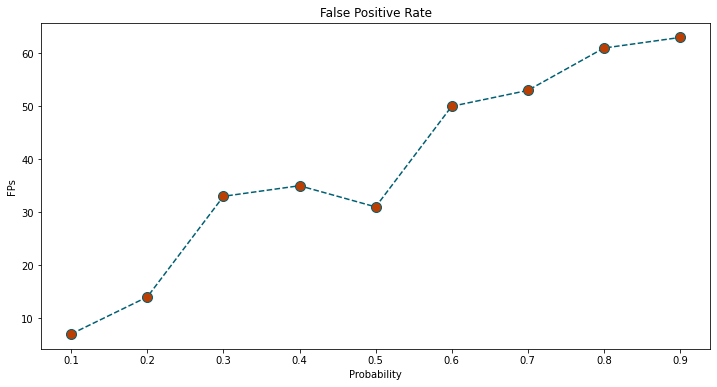

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FPs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Positive Rate')  
plt.xlabel('Probability')  
plt.ylabel('FPs') 

Text(0, 0.5, 'FNs')

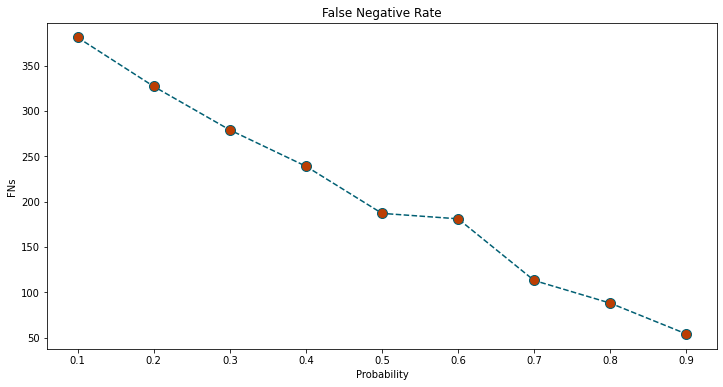

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), FNs, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('False Negative Rate')  
plt.xlabel('Probability')  
plt.ylabel('FNs') 

Text(0, 0.5, 'Accuracy')

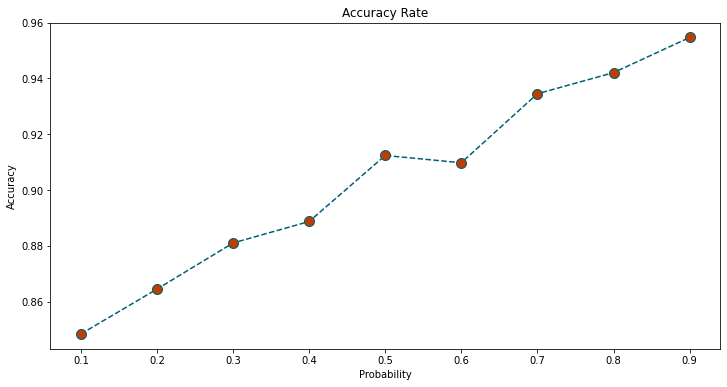

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(np.arange(0.1, 1, 0.1), accuracys, color='#005f73', linestyle='dashed', marker='o',  
         markerfacecolor='#bb3e03', markersize=10)
plt.title('Accuracy Rate')  
plt.xlabel('Probability')  
plt.ylabel('Accuracy') 

# Regressão Logistica

In [171]:
LR = LogisticRegression(solver='saga',multi_class='multinomial').fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [172]:
yhat = LR.predict(X_test)
yhat

array([6, 2, 0, ..., 5, 0, 4], dtype=int8)

In [173]:
f1_score(y_test, yhat, average='weighted') 

0.6928224542433501

In [174]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
#print("Precision Test:",metrics.precision_score(y_test, yhat))

Accuracy Test: 0.7009878419452887


In [175]:
y_proba = LR.predict_proba(X_test)

In [176]:
y_proba[0]

array([0.14, 0.02, 0.06, 0.08, 0.01, 0.04, 0.64])

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       382
           1       0.65      0.57      0.61       386
           2       0.64      0.69      0.66       404
           3       0.67      0.70      0.68       345
           4       0.93      0.87      0.90       378
           5       0.75      0.83      0.78       383
           6       0.63      0.89      0.74       354

    accuracy                           0.70      2632
   macro avg       0.70      0.70      0.69      2632
weighted avg       0.70      0.70      0.69      2632

Confusion matrix, without normalization
[[144  39  53  27   1  84  34]
 [ 20 220  44  67   5   9  21]
 [ 18  40 278   9  10   1  48]
 [ 18  17  13 240   0  13  44]
 [  0   4  21   2 330   0  21]
 [ 21  13   3  14   0 317  15]
 [  3   3  24   0   7   1 316]]


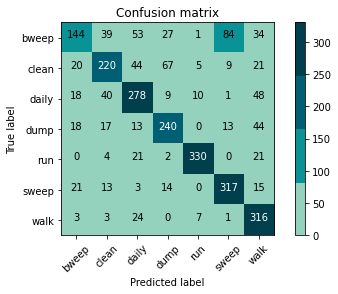

In [177]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix')

In [ ]:
num_folds = 5
scores = cross_val_score(LR, X_train, y_train, cv = num_folds)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
scores

array([0.7 , 0.68, 0.68, 0.7 , 0.69])

In [ ]:
stdevCross = scores.std()
stdevCross

0.00690692245784717

#SVM

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [180]:
yhat = clf.predict(X_test)
yhat 

array([3, 2, 5, ..., 5, 0, 4], dtype=int8)

In [181]:
f1_score(y_test, yhat, average='weighted') 

0.8750877901152662

In [182]:
yhat

array([3, 2, 5, ..., 5, 0, 4], dtype=int8)

In [183]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.8761398176291794


              precision    recall  f1-score   support

           0       0.86      0.73      0.79       382
           1       0.88      0.90      0.89       386
           2       0.86      0.85      0.86       404
           3       0.86      0.85      0.86       345
           4       0.96      0.96      0.96       378
           5       0.88      0.90      0.89       383
           6       0.82      0.95      0.88       354

    accuracy                           0.88      2632
   macro avg       0.88      0.88      0.88      2632
weighted avg       0.88      0.88      0.88      2632

Confusion matrix, without normalization
[[279  18  19  19   4  29  14]
 [  8 347  12   8   6   4   1]
 [  7  22 344   9   4   3  15]
 [  9   2   6 294   0   9  25]
 [  2   1   0   3 361   0  11]
 [ 19   3   5   7   0 343   6]
 [  1   1  12   2   0   0 338]]


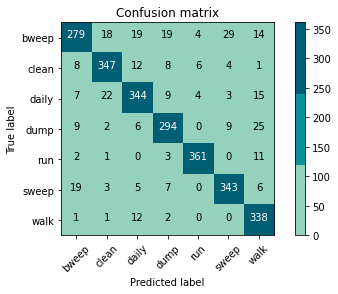

In [184]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=labels.tolist())
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelsName.tolist(),normalize= False,  title='Confusion matrix')

In [ ]:
num_folds = 5
scores = cross_val_score(clf, X_train, y_train, cv = num_folds)

In [ ]:
scores

array([0.87, 0.87, 0.87, 0.87, 0.88])

In [ ]:
stdevCross = scores.std()
stdevCross

0.0044659860763611985

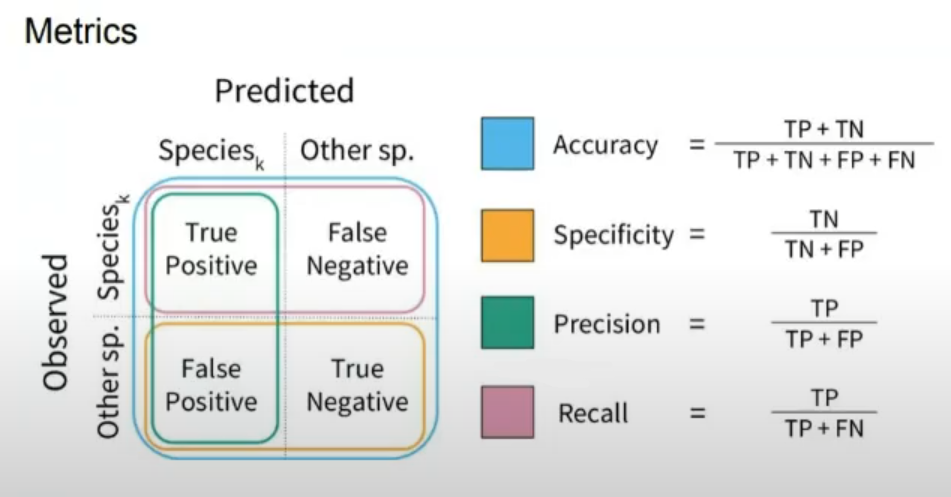